In [2]:
import csv
import numpy as np
from matplotlib import pyplot
from sklearn import linear_model
from sklearn.model_selection import cross_validate
import pandas as pd
import datetime as dt
import math
import sys

In [3]:
#read a file
df = pd.read_csv('logger1_2018-03-13_2018-12-16.csv', index_col=0)
print(df)

                 TIMESTAMP    RECORD    Bat_Avg  Pit_WL_Avg    L_UR_Avg  \
0      2018-03-13 16:20:00     138.0  12.715714   11.571429   57.051429   
1      2018-03-13 16:30:00     146.5  12.720000   11.611000   57.030000   
2      2018-03-13 16:40:00     156.5  12.720000   11.637000   56.990000   
3      2018-03-13 16:50:00     166.5  12.720000   11.650000   56.932000   
4      2018-03-13 17:00:00     176.5  12.718000   11.658000   56.939000   
5      2018-03-13 17:10:00     186.5  12.719000   11.658000   56.899000   
6      2018-03-13 17:20:00     196.5  12.720000   11.660000   56.846000   
7      2018-03-13 17:30:00     206.5  12.720000   11.663000   56.873000   
8      2018-03-13 17:40:00     216.5  12.720000   11.670000   56.866000   
9      2018-03-13 17:50:00     226.5  12.724000   11.685000   56.899000   
10     2018-03-13 18:00:00     236.5  12.721000   11.713000   56.854000   
11     2018-03-13 18:10:00     246.5  12.724000   11.743000   56.786000   
12     2018-03-13 18:20:0

In [4]:
#Let "to_datatime" read the date and time and convert them into datetime64
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

#Load_Avgの差分をとる
Load_Avg_difference = pd.DataFrame(df['Load_Avg'].diff())

#Fill out NaNs with 0.
Load_Avg_difference = Load_Avg_difference.fillna(0)
# print(Load_Avg_difference)

# Load_Avg_difference.columns = 'Load_Avg_difference'
Load_Avg_difference.rename(columns={"Load_Avg":"Load_Avg_difference"}, inplace=True)

#Concatnate df with Load_Avg_difference
df1 = pd.concat([df, Load_Avg_difference], axis=1)
print(df1)

                TIMESTAMP    RECORD    Bat_Avg  Pit_WL_Avg    L_UR_Avg  \
0     2018-03-13 16:20:00     138.0  12.715714   11.571429   57.051429   
1     2018-03-13 16:30:00     146.5  12.720000   11.611000   57.030000   
2     2018-03-13 16:40:00     156.5  12.720000   11.637000   56.990000   
3     2018-03-13 16:50:00     166.5  12.720000   11.650000   56.932000   
4     2018-03-13 17:00:00     176.5  12.718000   11.658000   56.939000   
5     2018-03-13 17:10:00     186.5  12.719000   11.658000   56.899000   
6     2018-03-13 17:20:00     196.5  12.720000   11.660000   56.846000   
7     2018-03-13 17:30:00     206.5  12.720000   11.663000   56.873000   
8     2018-03-13 17:40:00     216.5  12.720000   11.670000   56.866000   
9     2018-03-13 17:50:00     226.5  12.724000   11.685000   56.899000   
10    2018-03-13 18:00:00     236.5  12.721000   11.713000   56.854000   
11    2018-03-13 18:10:00     246.5  12.724000   11.743000   56.786000   
12    2018-03-13 18:20:00     256.5  1

In [5]:
print(df1.dtypes)

TIMESTAMP              datetime64[ns]
RECORD                        float64
Bat_Avg                       float64
Pit_WL_Avg                    float64
L_UR_Avg                      float64
L_UL_Avg                      float64
L_DR_Avg                      float64
L_DL_Avg                      float64
Load_Avg                      float64
WL_FMR_Avg                    float64
vel_P_Tot                     float64
turb1000_Avg                  float64
turb4000_Avg                  float64
DiffVolt_Avg                  float64
hp_Tot(1)                     float64
hp_Tot(2)                     float64
hp_Tot(3)                     float64
hp_Tot(4)                     float64
hp_Tot(5)                     float64
hp_Tot(6)                     float64
hp_Tot(7)                     float64
hp_Tot(8)                     float64
hp_Tot(9)                     float64
hp_Tot(10)                    float64
Rainfall                      float64
Velocity                      float64
WL          

In [6]:
df_fin = df1.set_index('TIMESTAMP').asfreq('30T').reset_index()
print(df_fin)

# mavgs = 3
# temp_X_cols = df1[X_cols].rolling(window=mavgs).mean()
# temp_y_cols = df1[y_cols].rolling(window=mavgs).mean()


# df1.dropna(how='any')
print(df_fin)

                TIMESTAMP    RECORD    Bat_Avg  Pit_WL_Avg    L_UR_Avg  \
0     2018-03-13 16:20:00     138.0  12.715714   11.571429   57.051429   
1     2018-03-13 16:50:00     166.5  12.720000   11.650000   56.932000   
2     2018-03-13 17:20:00     196.5  12.720000   11.660000   56.846000   
3     2018-03-13 17:50:00     226.5  12.724000   11.685000   56.899000   
4     2018-03-13 18:20:00     256.5  12.724000   11.757000   56.770000   
5     2018-03-13 18:50:00     286.5  12.730000   11.788000   56.775000   
6     2018-03-13 19:20:00     316.5  12.730000   11.790000   56.747000   
7     2018-03-13 19:50:00     346.5  12.730000   11.846000   56.737000   
8     2018-03-13 20:20:00     376.5  12.730000   11.903000   56.731000   
9     2018-03-13 20:50:00     406.5  12.736000   11.930000   56.734000   
10    2018-03-13 21:20:00     436.5  12.740000   11.927000   56.731000   
11    2018-03-13 21:50:00     466.5  12.730000   11.933000   56.731000   
12    2018-03-13 22:20:00     496.5  1

In [7]:
#Choose data we are gonna use
#YOU SHOULD CHANGE HERE IF YOU WANNA SELECT DIFFERENT INPUT DATA OR ADD SOME DATA AS INPUTS
# y_cols = ['Load_Avg_difference']
y_cols = ['Load_Avg_difference']

#ALL
X_cols = ['Bat_Avg', 'WL_FMR_Avg', 'vel_P_Tot',
       'turb1000_Avg', 'turb4000_Avg', 'DiffVolt_Avg', 'hp_Tot(1)',
       'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)',
       'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)', 'Rainfall',
       'Velocity', 'WL']

X = df_fin[X_cols]
y = df_fin[y_cols]
# #     X.rolling(window=5).mean()
#     y.rolling(window=5).mean()



In [8]:
print(X)

         Bat_Avg  WL_FMR_Avg  vel_P_Tot  turb1000_Avg  turb4000_Avg  \
0      12.715714  509.842857   2.577429          0.00     10.352857   
1      12.720000  509.410000   2.713400          0.00     10.281000   
2      12.720000  509.040000   2.765300          0.00     10.189000   
3      12.724000  508.690000   2.887800          0.00     10.059000   
4      12.724000  508.520000   2.980400          0.00     10.147000   
5      12.730000  508.300000   2.977700          0.00      9.962000   
6      12.730000  508.200000   2.896800          0.00      9.909000   
7      12.730000  508.000000   2.832400          0.00      9.928000   
8      12.730000  507.820000   2.770900          0.00      9.578000   
9      12.736000  507.700000   2.781500          0.00      9.423000   
10     12.740000  507.600000   2.733600          0.00      9.743000   
11     12.730000  507.600000   2.820000          0.00      9.516000   
12     12.740000  507.600000   2.740100          0.00      9.519000   
13    

In [9]:
#Cut data where pit weigh < 1000?500?
df_fin['Load_Avg'] = df_fin['Load_Avg'].values.astype('float')
df_cut1 = df_fin[(df_fin['Load_Avg'] > 200)&(df_fin['Load_Avg'] < 1300)]

# Cut data where pit load difference is out of margin of error
df_cut2 = df_cut1[(df_cut1['Load_Avg_difference'] < 20)&(df_cut1['Load_Avg_difference'] > -0.5)]

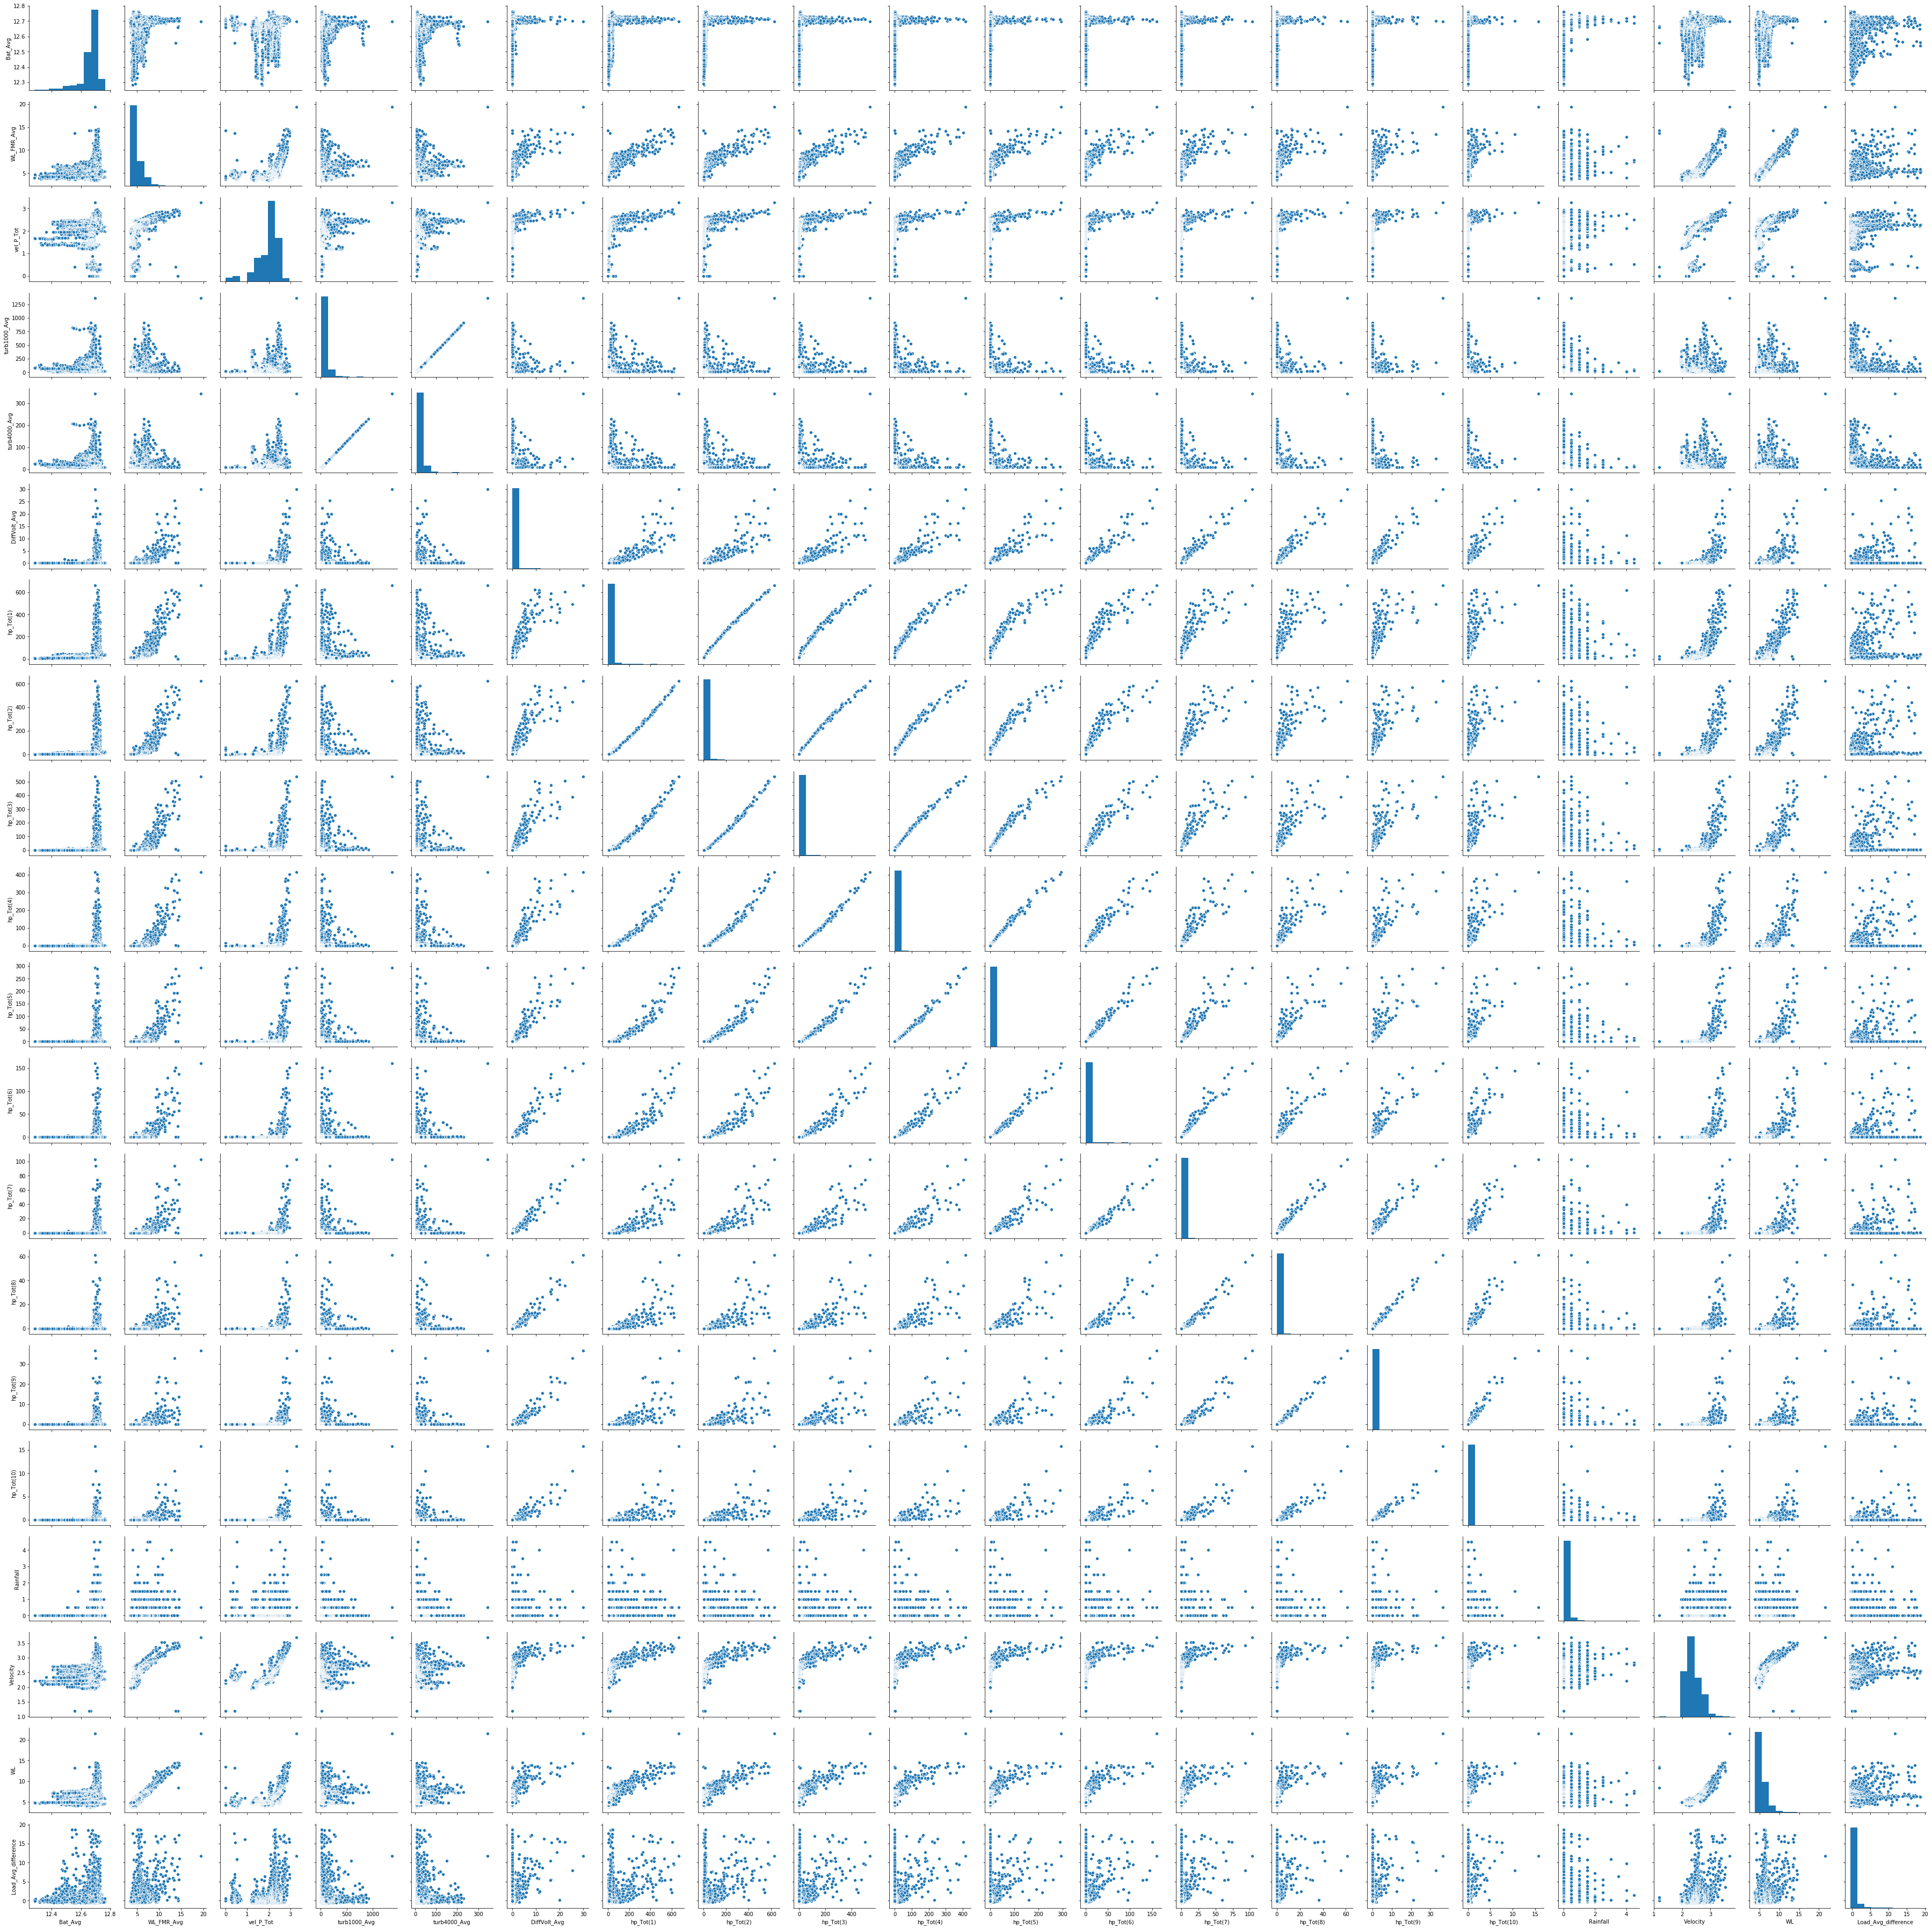

In [10]:
# 「散布図行列」を作成する。散布図行列を利用すれば、データセットの特徴量のペアに対す
# る相関関係を1 つの平面上で可視化可能
import matplotlib.pyplot as plt
import seaborn as sns
Xy_cols = X_cols + y_cols
df_f = df_cut2[Xy_cols].astype('float')
sns.pairplot(df_f[Xy_cols],height=2.5)
#グラフを保存するときは描画させない
# plt.show()
plt.savefig('figure.png')

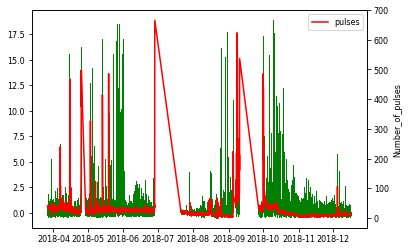

In [14]:
df_cut3 = df_cut2.set_index('TIMESTAMP')

fig, ax1 = plt.subplots()

#x軸
s=df_cut3.index

#主軸に出来高の棒グラフ
ax1.bar(s,df_cut3['Load_Avg_difference'], color = 'g')

#主軸と2軸の関連づけ
ax2=ax1.twinx()

#第2軸に株価
ax2.plot(s,df_cut3['hp_Tot(1)'],'r', label = 'pulses')

# 描画の調整
plt.rcParams['font.size'] = 8
plt.ylabel('Number_of_pulses')
plt.legend()
plt.savefig('compiration_LADandHP(1).png')
plt.show()

In [53]:
X = df_cut2[X_cols].values.astype('float')
y = df_cut2[y_cols].values.astype('float')

In [54]:
#Devide data into Training set and test set
#In Machine Learning course of coursera, I learned that I have to devide the data set into Training set, Cross calidation set,Test set.
#But in this case I'll just follow the code that I found online. Probably I'll have to fix this part once I get to know much more about Machine Learning.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
X_ori_train = X_train
X_ori_test = X_test
y_ori_train = y_train
y_ori_test = y_test

In [55]:
# train the parameters with regression model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(100)
# n_estimators : integer, optional (default=10)
# The number of trees in the forest.

model.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [56]:
#Score
#coefficient of determination R^2 

print(model.score(X_test,y_test))

0.3869478244831773


In [57]:
# #Score without the data where there's no events happning
#Delete data of when the pit gets cleared 

df_y_test = pd.DataFrame(y_test)
df_y_test.columns = y_cols
df_X_test = pd.DataFrame(X_test)
df_X_test.columns = X_cols

df_yX_test = pd.concat([df_y_test, df_X_test], axis=1)

df_yX_test_del = df_yX_test[(df_yX_test['Load_Avg_difference'] < 20)&(df_yX_test['Load_Avg_difference'] > 1)]
X_test_del = df_yX_test_del[X_cols].values.astype('float')
y_test_del = df_yX_test_del[y_cols].values.astype('float')


print("Score ,when y>1")
print(model.score(X_test_del,y_test_del))
print("The number of the data where y > 1 ", "is " ,len(y_test_del))

Score ,when y>1
0.08216857092110053
The number of the data where y > 1  is  359


In [110]:
# y, X should be real data. X is gonna put into the model you made 
# and the model will give you the predictions. 
# This line graph shows how the predicitons match with the real data which is y.
# Second gragh zooms out the part where you chose from sta to end.
class Graph:
    def __init__(self, y, X):
        self.y = y
        self.X = X
        

    def line_graph(self, sta = 0, end = len(y)):
        result = model.predict(self.X)
        #flatten y_test to applay the data to a graph
        y_graph = self.y.flatten()
        #
        df_result = pd.DataFrame({"y_test":y_graph,"result":result})

        #
        %matplotlib inline
        import matplotlib
        import matplotlib.pyplot as plt

        # Draw graph
        df_result.plot(figsize=(15, 3))
        
        # Zoom out where you chose
        df_result[sta:end].plot(figsize=(15, 3))
        plt.show()
        
    def cumlate_graph(self, sta = 0, end = len(y)):
        result = model.predict(self.X)

        p_res = np.cumsum(result)
        y_res = np.cumsum(self.y)

        %matplotlib inline
        import matplotlib
        import matplotlib.pyplot as plt

        df_p_x = pd.DataFrame({"original":y_res,"result":p_res})
        df_p_x.plot(figsize=(15, 3))
        df_p_x[sta:end].plot(figsize=(15, 3))
        plt.show()

        
    #Take a look at a distribution map between y and X
    def distribution_map(self, number = 0):
        import matplotlib.pyplot as plt
        # Notebook出力には次の１行が必要
        %matplotlib inline

        # # Plot the data you select
        plt.figure(figsize=(8, 6))

        plt.scatter(self.y, self.X[:,number])
        plt.show()

        
    


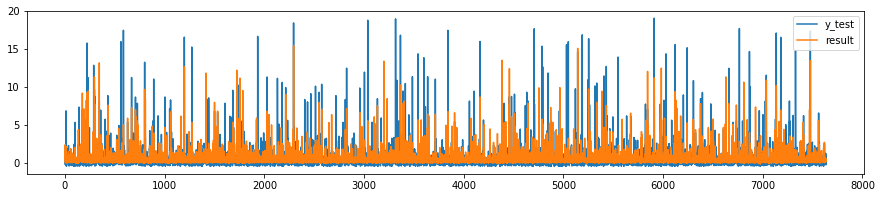

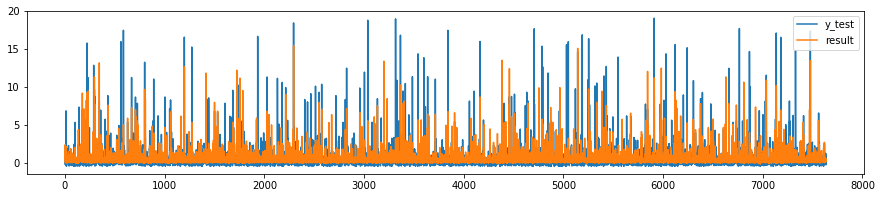

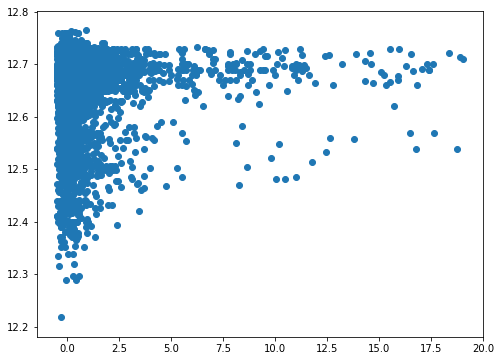

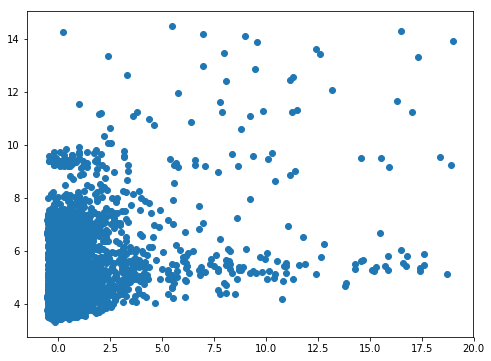

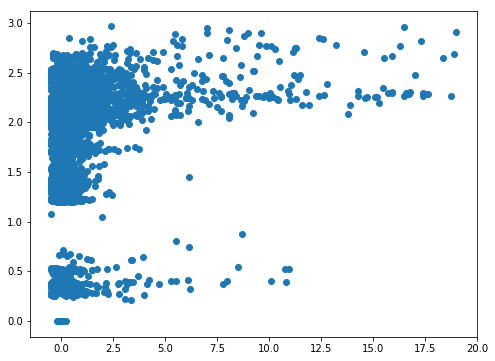

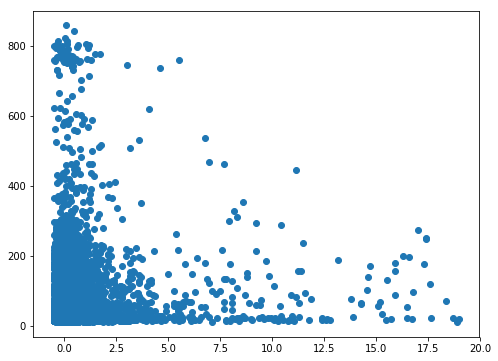

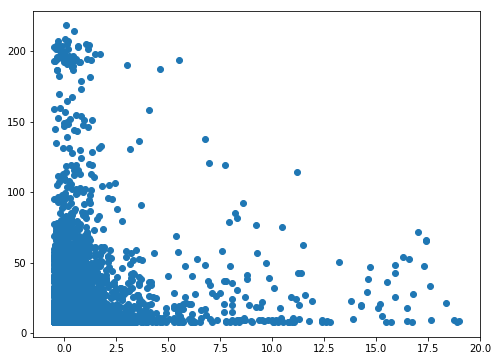

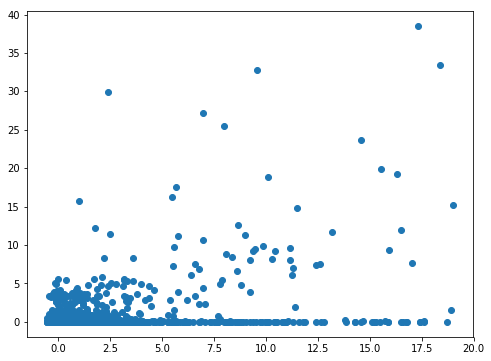

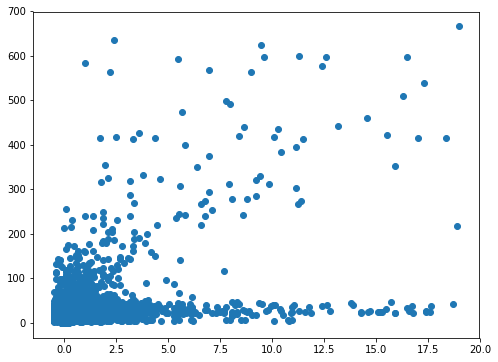

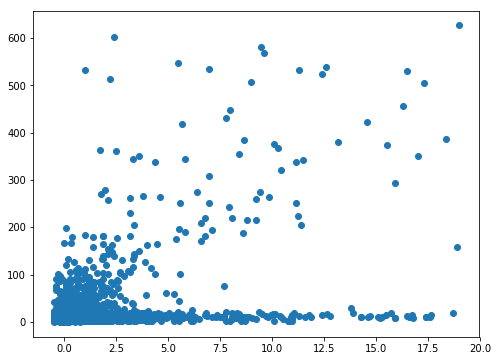

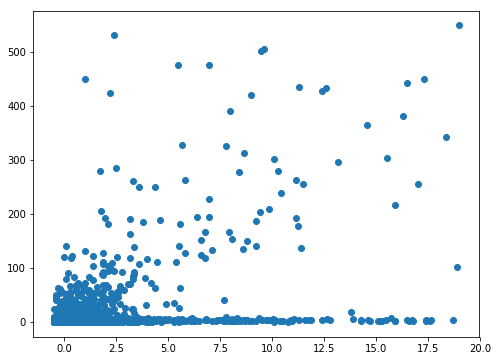

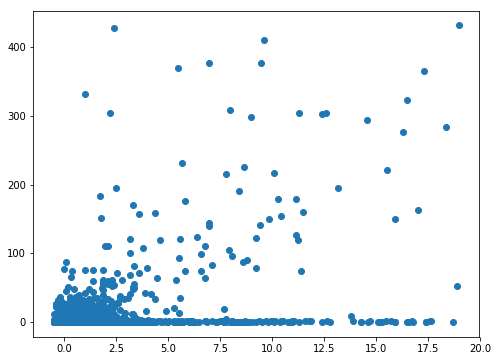

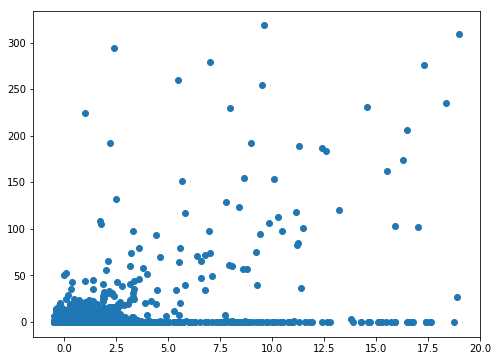

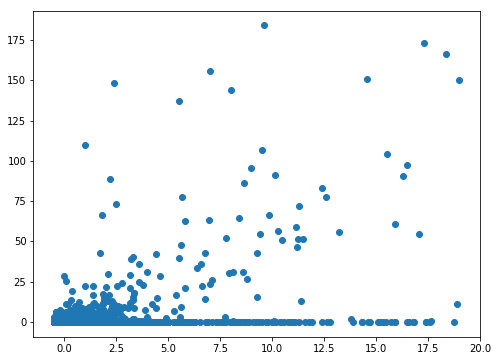

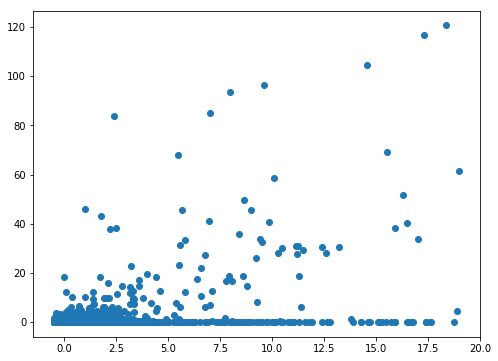

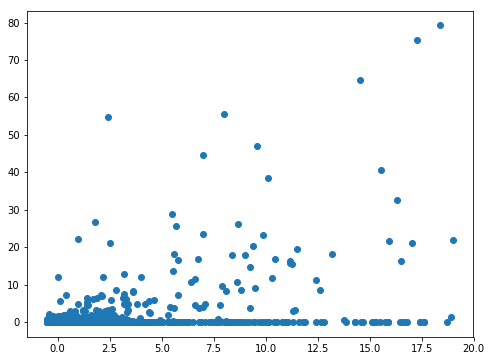

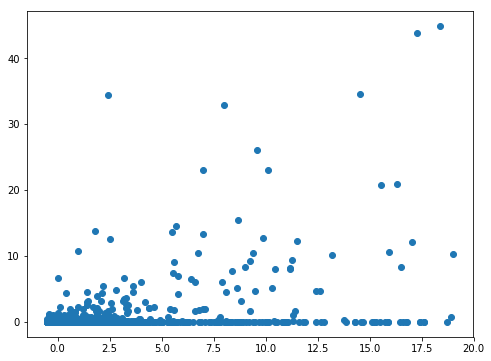

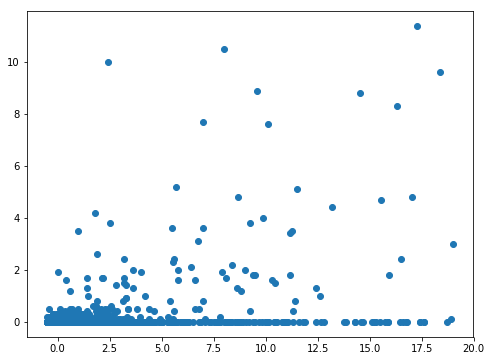

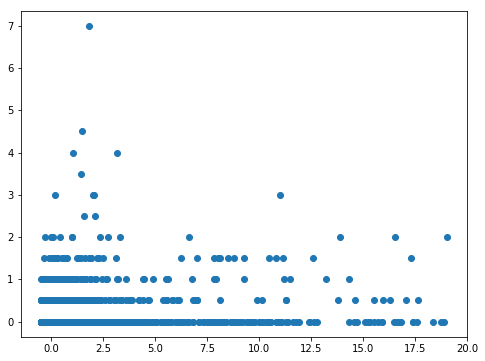

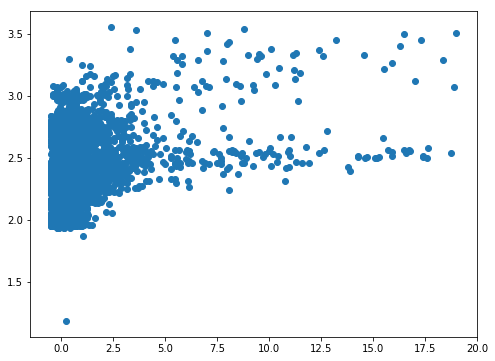

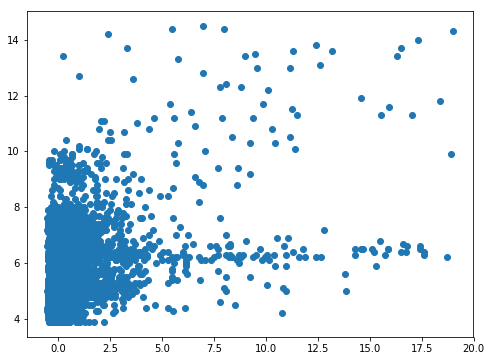

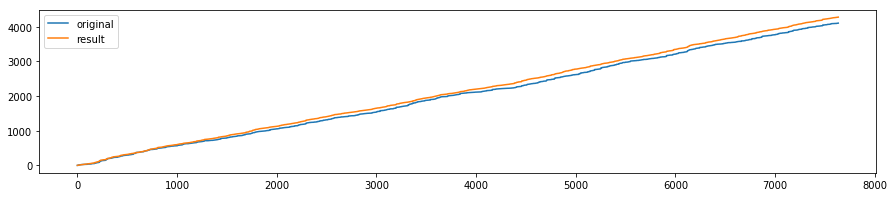

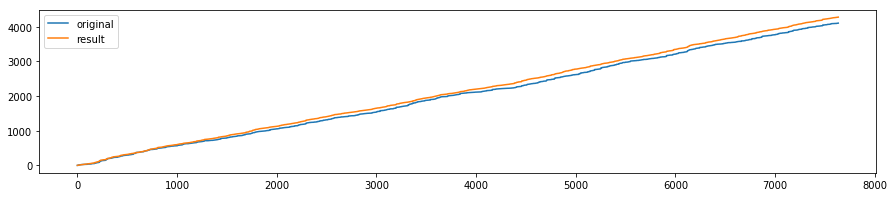

In [111]:
# Graphs of test data

yX_test = Graph(y_test,X_test)
yX_test.line_graph()
for i in range(len(X_cols)):
    yX_test.distribution_map(i)
yX_test.cumlate_graph()

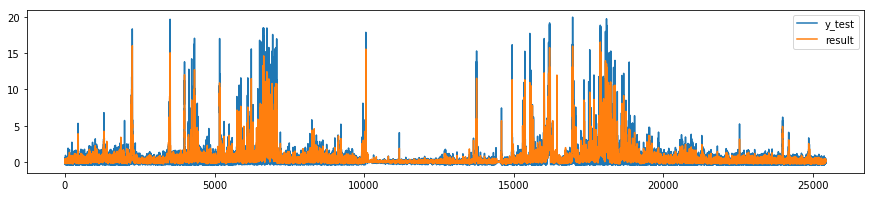

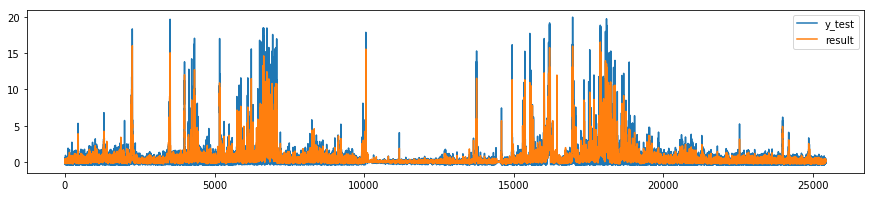

In [112]:
yX_all = Graph(y, X)
yX_all.line_graph()
# yX_all.cumlate_graph(90000,100000)
# for i in range(len(X_cols)):
#     yX_all.distribution_map(i)
#     print(X_cols[i])

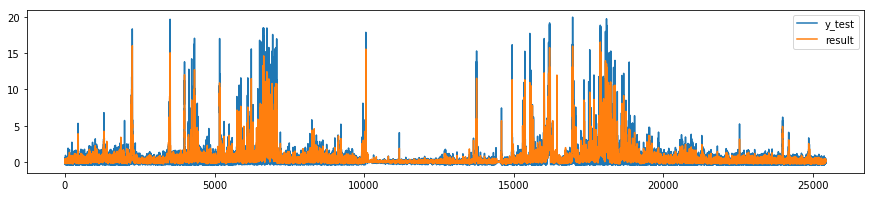

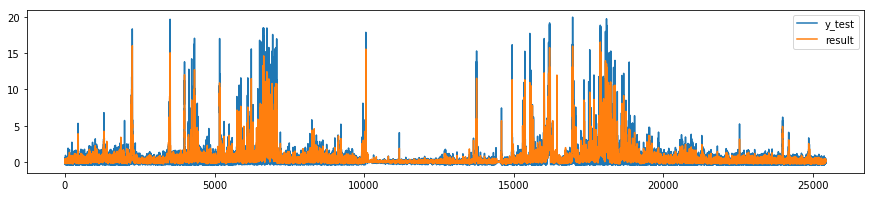

In [113]:
yX_all = Graph(y, X)
yX_all.line_graph()

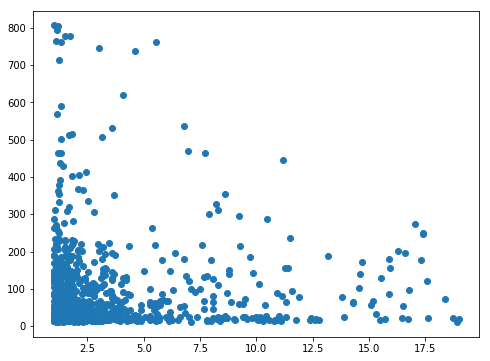

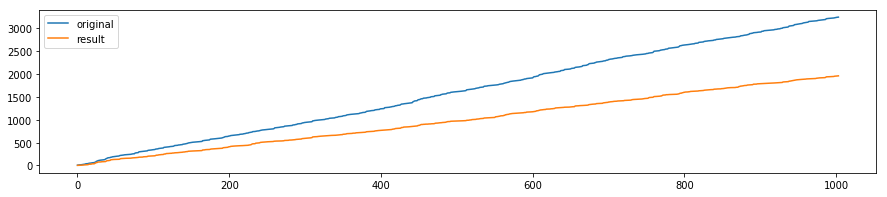

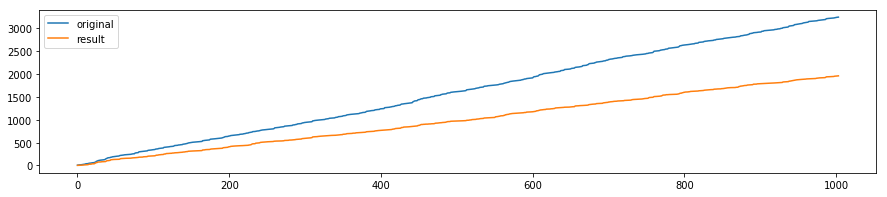

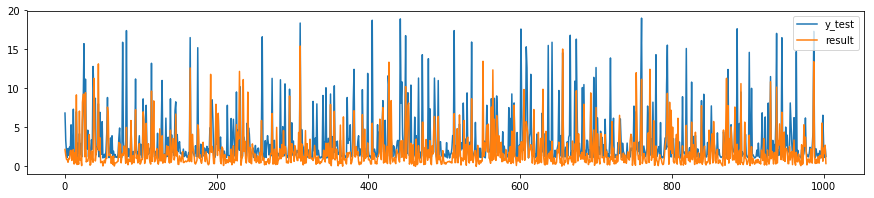

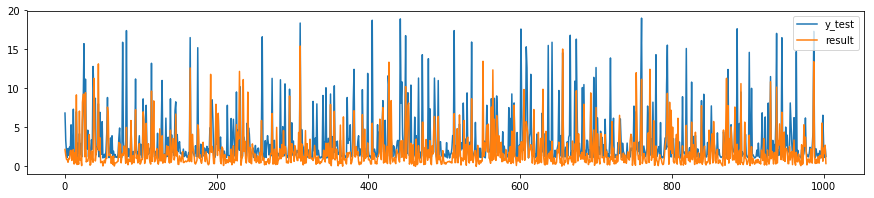

In [115]:
yX_test_del = Graph(y_test_del, X_test_del)
yX_test_del.distribution_map(3)
yX_test_del.cumlate_graph()
yX_test_del.line_graph()

In [117]:
df_ori = df_new[(df_new['hp_Tot(6)'] > -10)&(df_new['hp_Tot(6)'] < 500)]

X_ori = df_ori[X_cols].values.astype('float')
y_ori = df_ori[y_cols].values.astype('float')


yX_ori = Graph(y_ori, X_ori)
yX_ori.cumlate_graph()


KeyError: 'hp_Tot(6)'

1   vel_P_Tot   0.13584019165978417
2   WL   0.09243407290963523
3   DiffVolt_Avg   0.07225507830595138
4   hp_Tot(1)   0.07033220573679466
5   WL_FMR_Avg   0.06495220226830527
6   Velocity   0.0647920597341641
7   turb4000_Avg   0.062056546298229376
8   Bat_Avg   0.06188835936556217
9   turb1000_Avg   0.0543422540672418
10   hp_Tot(2)   0.05351694264534384
11   hp_Tot(7)   0.05137027683490555
12   hp_Tot(6)   0.050783971737373264
13   hp_Tot(3)   0.042948108422373385
14   hp_Tot(5)   0.042785626786876155
15   hp_Tot(4)   0.04033891233354723
16   hp_Tot(8)   0.012468292967479573
17   Rainfall   0.011941876209210755
18   hp_Tot(10)   0.010602913845974728
19   hp_Tot(9)   0.004350107871247319


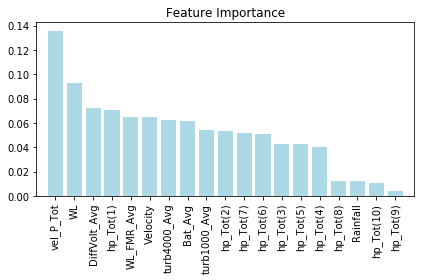

In [58]:
#
feature = model.feature_importances_

#特徴量の重要度を上から順に出力する
f = pd.DataFrame({'number': range(0, len(feature)),
             'feature': feature[:]})
f2 = f.sort_values('feature',ascending=False)
f3 = f2.loc[:, 'number']

#Name of the features
dfX = pd.DataFrame(X)
dfX.columns = X_cols
label = dfX.columns[0:]

#arrange the features in order of importance
indices = np.argsort(feature)[::-1]

for i in range(len(feature)):
    print( str(i + 1) + "   " + str(label[indices[i]]) + "   " + str(feature[indices[i]]))

          
import matplotlib
import matplotlib.pyplot as plt
plt.title('Feature Importance')
plt.bar(range(len(feature)),feature[indices], color='lightblue', align='center')
plt.xticks(range(len(feature)), label[indices], rotation=90)
plt.xlim([-1, len(feature)])
plt.tight_layout()
plt.show()

In [22]:
# from sklearn.datasets import *
# from sklearn import tree
# from dtreeviz.trees import *
# import graphviz

In [23]:
# from sklearn.datasets import *
# from sklearn import tree
# from dtreeviz.trees import *

# X_cols_np = np.array(X_cols)

# regr = tree.DecisionTreeRegressor(max_depth=10)
# regr.fit(X_train, y_train.ravel())

# viz = dtreeviz(regr,
#                X_train,
#                y_train.ravel(),
#                target_name="",
#                feature_names= X_cols_np
#               )

# #There's a UnicodeDecodeError problem if you try to visualize "viz",which is caused by the Japanese setting of this computer.
# #"viz.view()" works fine on Ubuntu in my Virtual machine.
# # viz.view()

In [24]:
# print(regr.score(X_test,y_test))